# Analisis exploratorio Series Temporales - Parte 2

#### Pablo Blanco - 244184

## Ejercicios

1. (ej. 2.9) Mejorar el ajuste del periodograma anteior a la serie SOI ajustando previamente una tendencia y trabajando con los residuos. Encontrar las frecuencias básicas.

2. Discutir el ej. 2.10 del libro.

3. Analizar el uso de la función `nls` para hacer una ajuste de *regresión logística* a la serie de poblaciones de Australia entre 1778 y 2005

#### Ejercicio 1

2.9 In this problem, we will explore the periodic nature of St , the SOI series displayed in Figure 1.5.

(a) Detrend the series by fitting a regression of St on time t. Is there a significant trend in the sea surface temperature? Comment.

(b) Calculate the periodogram for the detrended series obtained in part (a). Identify the frequencies of the two main peaks (with an obvious one at the frequency of one cycle every 12 months). What is the probable El Niño cycle indicated by the minor peak?

###### (a)

In [2]:
library (astsa)

Warning message:
"package 'astsa' was built under R version 3.6.3"

[1] 0.08003753


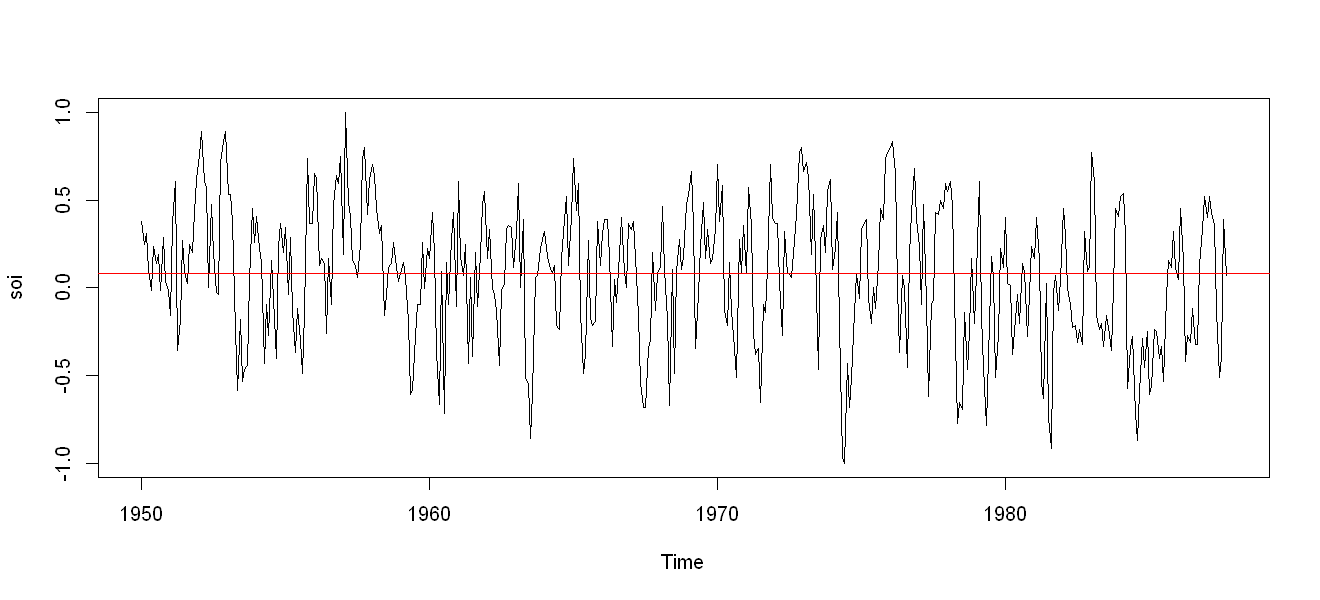

In [3]:

m = mean(soi)
options(repr.plot.width=11, repr.plot.height=5) #ajusta tamaño de graficas
print(m)

ts.plot(soi)
abline(h=mean(soi), col='red', lwd=1, main='SOI y su Media')

In [4]:
#Intentamos ajustar SOI con un modelo lineal con una constante, la tendencia y el error y luego trabajaremos sobre los residuos

fit1 <- lm(soi~time(soi), data=soi, na.action=NULL)
summary(fit1)


Call:
lm(formula = soi ~ time(soi), data = soi, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.04140 -0.24183  0.01935  0.27727  0.83866 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.70367    3.18873   4.298 2.12e-05 ***
time(soi)   -0.00692    0.00162  -4.272 2.36e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3756 on 451 degrees of freedom
Multiple R-squared:  0.0389,	Adjusted R-squared:  0.03677 
F-statistic: 18.25 on 1 and 451 DF,  p-value: 2.359e-05


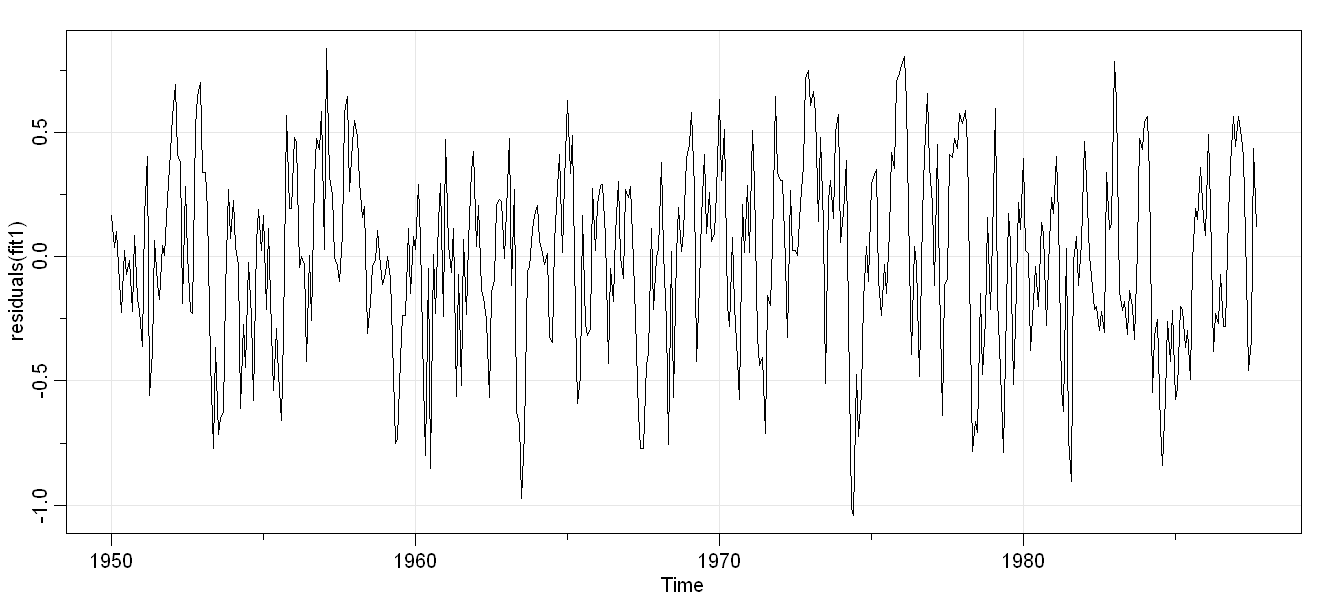

In [7]:
tsplot(residuals(fit1))


ACF,0.59,0.35,0.18,0.01,-0.15,-0.23,-0.22,-0.14,0.01,0.19,...,-0.02,-0.16,-0.27,-0.30,-0.28,-0.16,0.04,0.20,0.37,0.40
PACF,0.59,0.00,-0.03,-0.12,-0.16,-0.08,0.01,0.07,0.15,0.18,...,-0.10,-0.04,0.00,0.07,-0.01,-0.02,0.02,-0.02,0.09,0.01


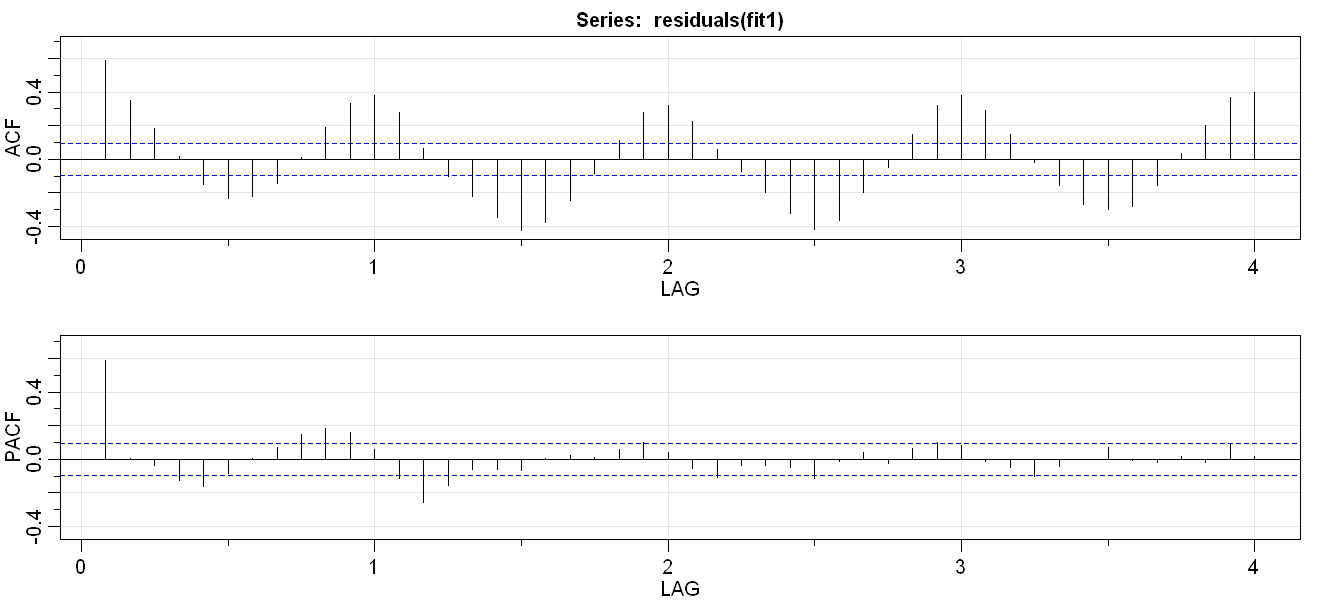

In [9]:
acf2(residuals(fit1))

Vemos un comportamiento de sinusoide en el ACF y un lag fuera del intervalo de confianza en el gráfico de PACF por lo que podríamos afirmar que los residuos no son ruido blanco y que necesitamos seguir profundizando el análisis

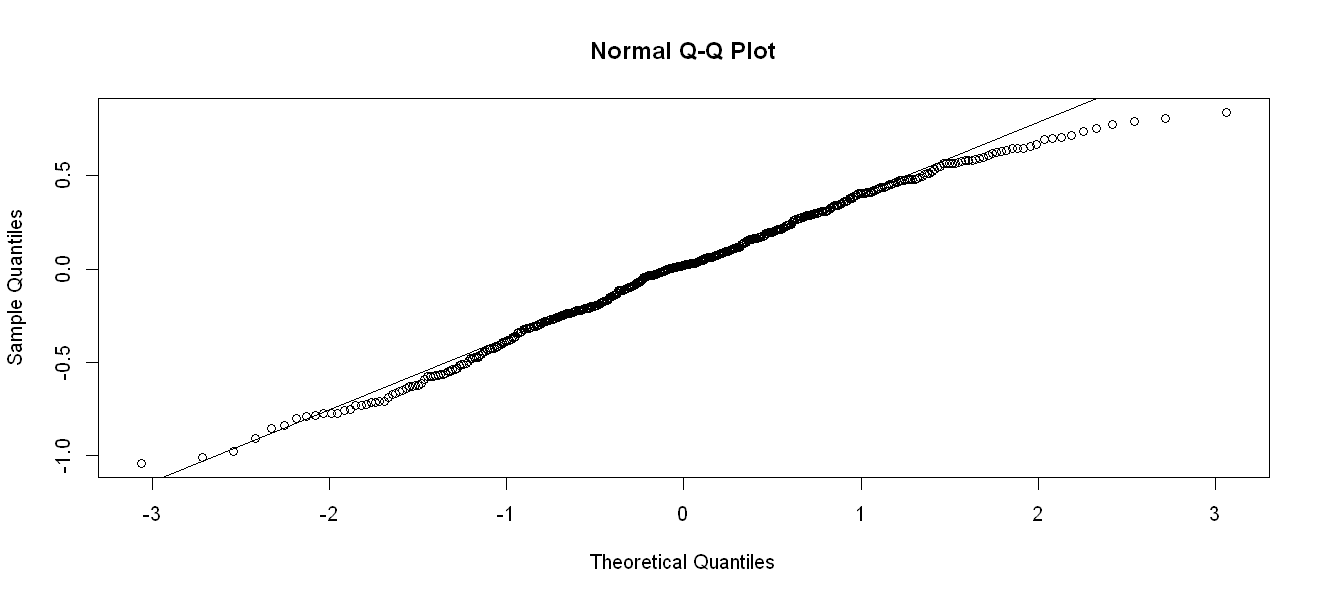

In [11]:
qqnorm(residuals(fit1))
qqline(residuals(fit1))

Si bien el ajuste del gráfico de residuos ajusta muy bien en el centro, vemos que tiene algunos desvíos en los extremos, en especial a la derecha. 

#### 2. Discutir el ej. 2.10 del libro.


2.10 Consider the two weekly time series oil and gas. The oil series is in dollars per
barrel, while the gas series is in cents per gallon.

(a) Plot the data on the same graph. Which of the simulated series displayed in
Section 1.2 do these series most resemble? Do you believe the series are stationary
(explain your answer)?

(b) In economics, it is often the percentage change in price (termed growth rate or
return), rather than the absolute price change, that is important. Argue that a
transformation of the form yt = r log xt might be applied to the data, where xt is
the oil or gas price series. Hint: Recall Footnote 1.2.

(c) Transform the data as described in part (b), plot the data on the same graph, look
at the sample ACFs of the transformed data, and comment.

(d) Plot the CCF of the transformed data and comment The small, but significant
values when gas leads oil might be considered as feedback.

(e) Exhibit scatterplots of the oil and gas growth rate series for up to three weeks
of lead time of oil prices; include a nonparametric smoother in each plot and
comment on the results (e.g., Are there outliers? Are the relationships linear?).

(f)There have been a number of studies questioning whether gasoline prices respond
more quickly when oil prices are rising than when oil prices are falling (“asymmetry”).
We will attempt to explore this question here with simple lagged regression;
we will ignore some obvious problems such as outliers and autocorrelated errors,
so this will not be a definitive analysis. Let Gt and Ot denote the gas and oil
growth rates.

(i) Fit the regression (and comment on the results)
Gt = 1 + 2It + 1Ot + 2Ot􀀀1 + wt;
where It = 1 if Ot  0 and 0 otherwise (It is the indicator of no growth or
positive growth in oil price). Hint:
poil = diff(log(oil))
pgas = diff(log(gas))
indi = ifelse(poil < 0, 0, 1)
mess = ts.intersect(pgas, poil, poilL = lag(poil,-1), indi)
summary(fit <- lm(pgas~ poil + poilL + indi, data=mess))
(ii) What is the fitted model when there is negative growth in oil price at time
t? What is the fitted model when there is no or positive growth in oil price?
Do these results support the asymmetry hypothesis?
(iii) Analyze the residuals from the fit and comment.

### (a)

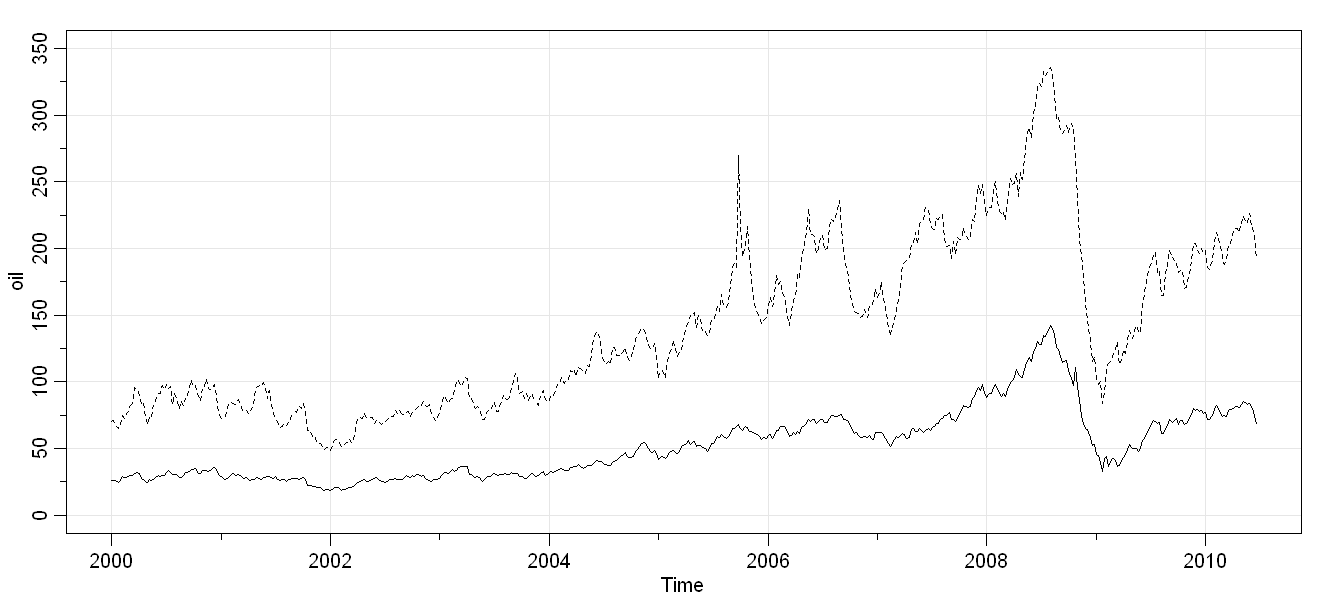

In [13]:
tsplot(oil, ylim=c(0, 350))
lines(gas, lty=2)

### (b)

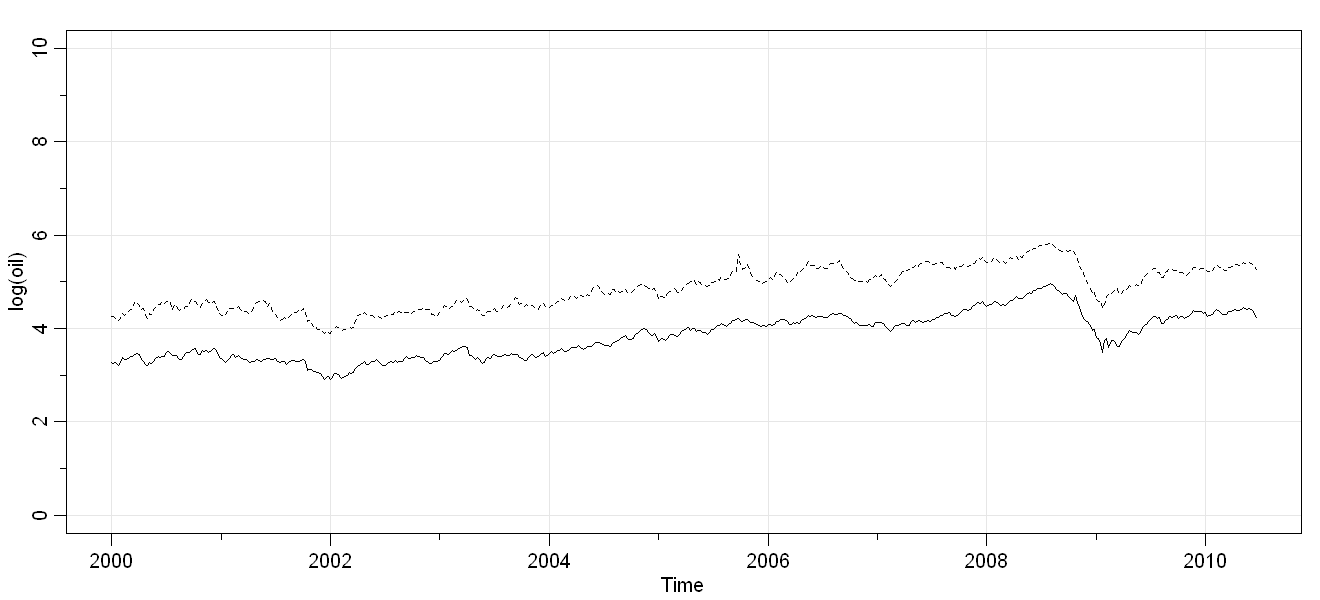

In [15]:
tsplot(log(oil), ylim=c(0,10))
lines(log(gas), lty=2)

Al transformar las variables con logaritmo podemos ver una mayor correlación de las mismas, ya que se reflean las variaciones porcentuales y no los valores absolutos. 

Al tratarse de productos relacionados (uno derivado del otro) era de esperar un comportamiento de éste tipo, en la cual los los incrementos y decrementos fueran a la par aunque a diferentes puntos de partida. 

Si queremos remover posibles estacionalidades es necesario diferenciar la serie

### (c)

In [18]:
diff_log_oil <- diff(log(oil))
diff_log_gas <- diff(log(gas))

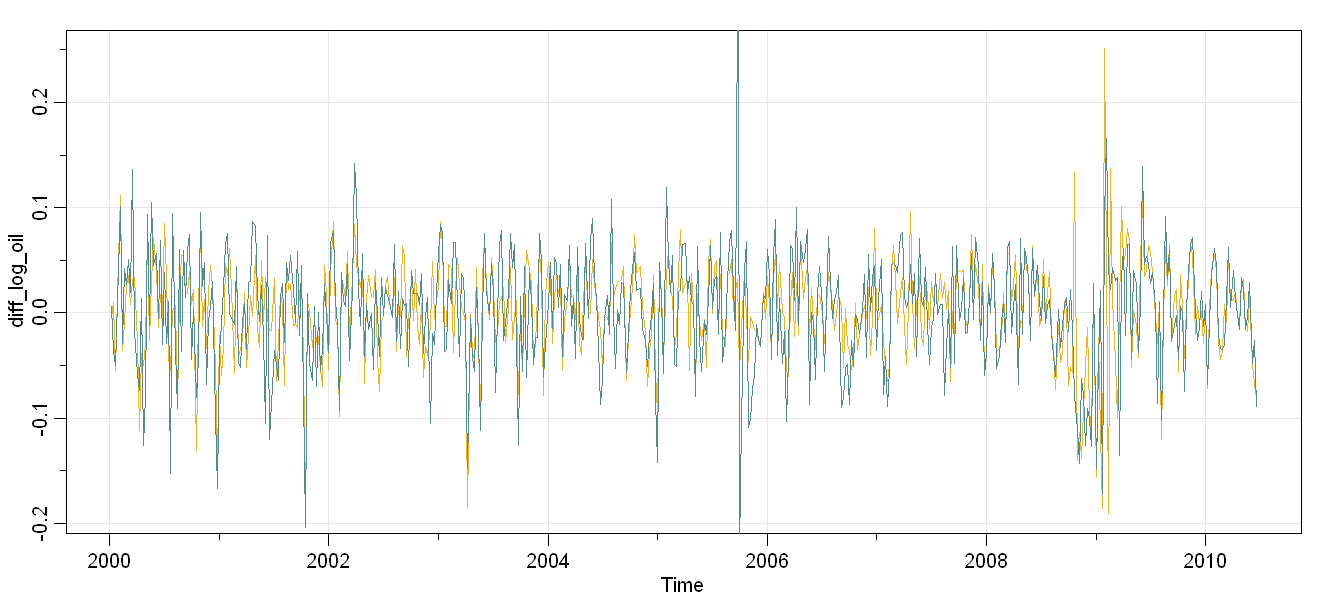

In [21]:
tsplot(diff_log_oil, col = "goldenrod2")
lines(diff_log_gas, col= "darkslategray4")

ACF,0.13,-0.07,0.13,-0.01,0.02,-0.03,-0.03,0.13,0.08,0.02,...,0.02,0,0.00,0.00,-0.04,0.00,0.04,0.04,0.04,0.01
PACF,0.13,-0.09,0.16,-0.06,0.05,-0.08,0.00,0.12,0.05,0.03,...,0.00,0,-0.02,-0.01,-0.05,-0.01,0.02,0.04,0.05,-0.01


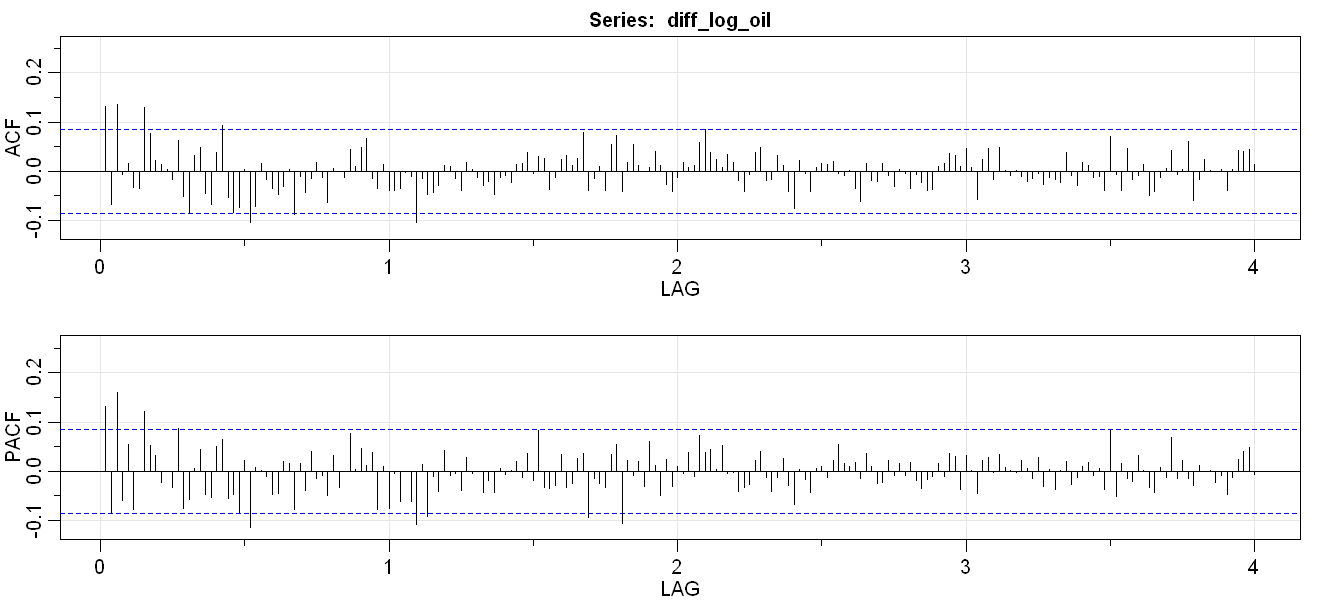

ACF,0.11,0.06,0.13,-0.01,-0.04,-0.04,-0.08,-0.02,-0.09,0.01,...,-0.02,0.04,-0.02,-0.04,0,0.01,0.00,0.02,0.08,0.08
PACF,0.11,0.05,0.12,-0.04,-0.04,-0.04,-0.07,0.01,-0.08,0.04,...,-0.03,0.05,-0.06,-0.04,0,0.02,-0.01,0.02,0.08,0.05


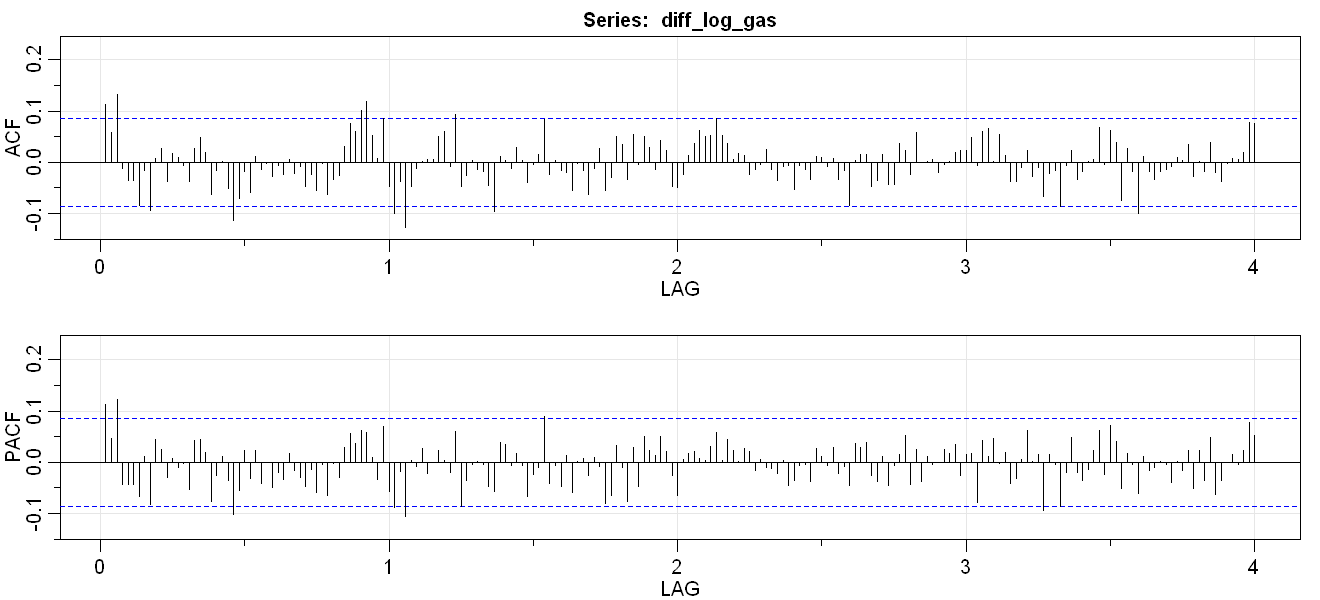

In [22]:
acf2(diff_log_oil)
acf2(diff_log_gas)

Si bien algunos lags todavía estan por encima del intervalo de confianza, podemos ver que las diferencias de las series se asemejan en gran medida a un ruido blanco. 

### (d)

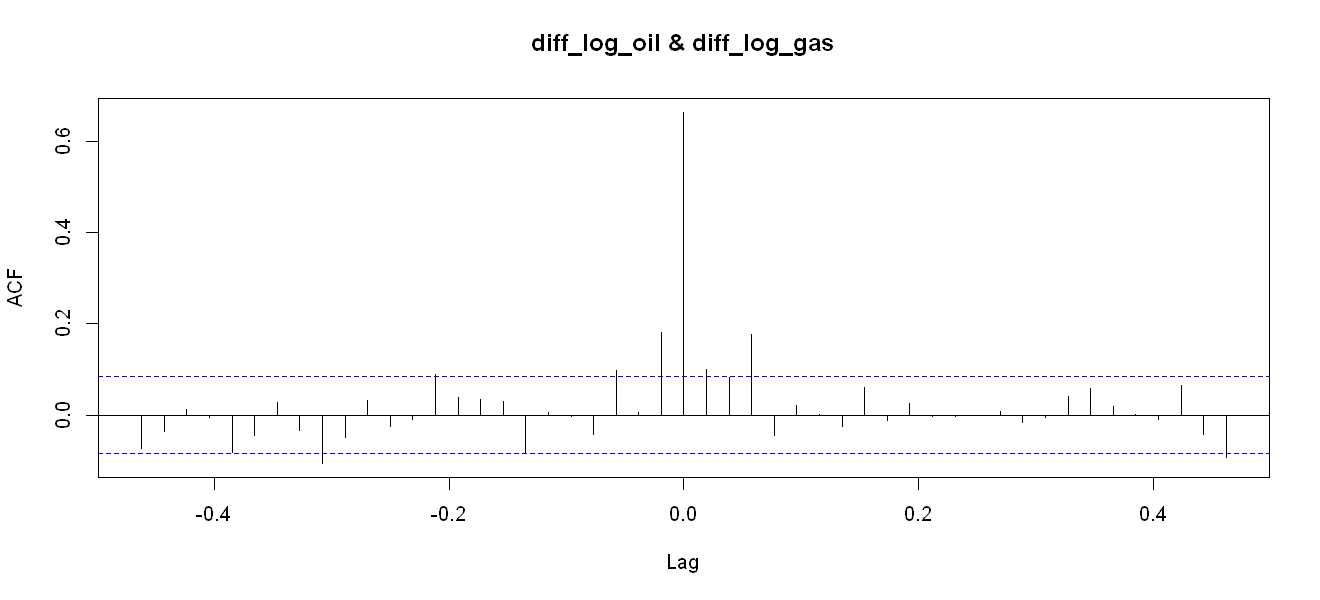

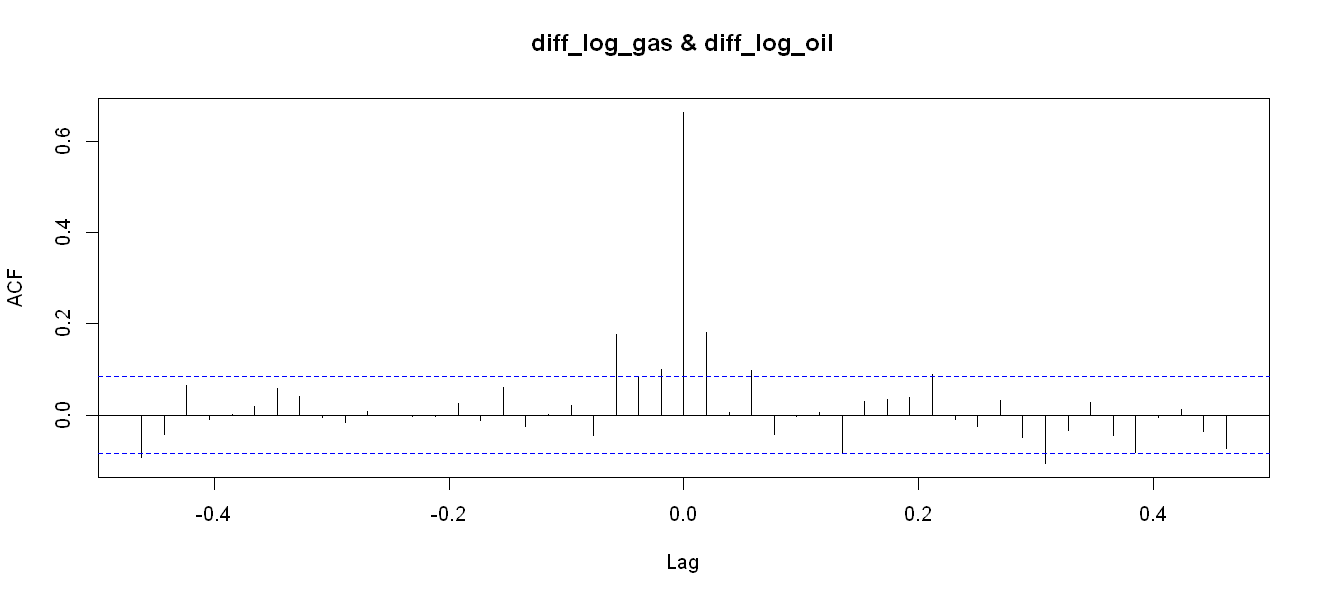

In [24]:
ccf(diff_log_oil, diff_log_gas)  
ccf(diff_log_gas, diff_log_oil)

Los rezagos parecen correlacionados en los lags -1 y -3, tomando en cuenta como base la serie del precio del petroleo.

### (e)

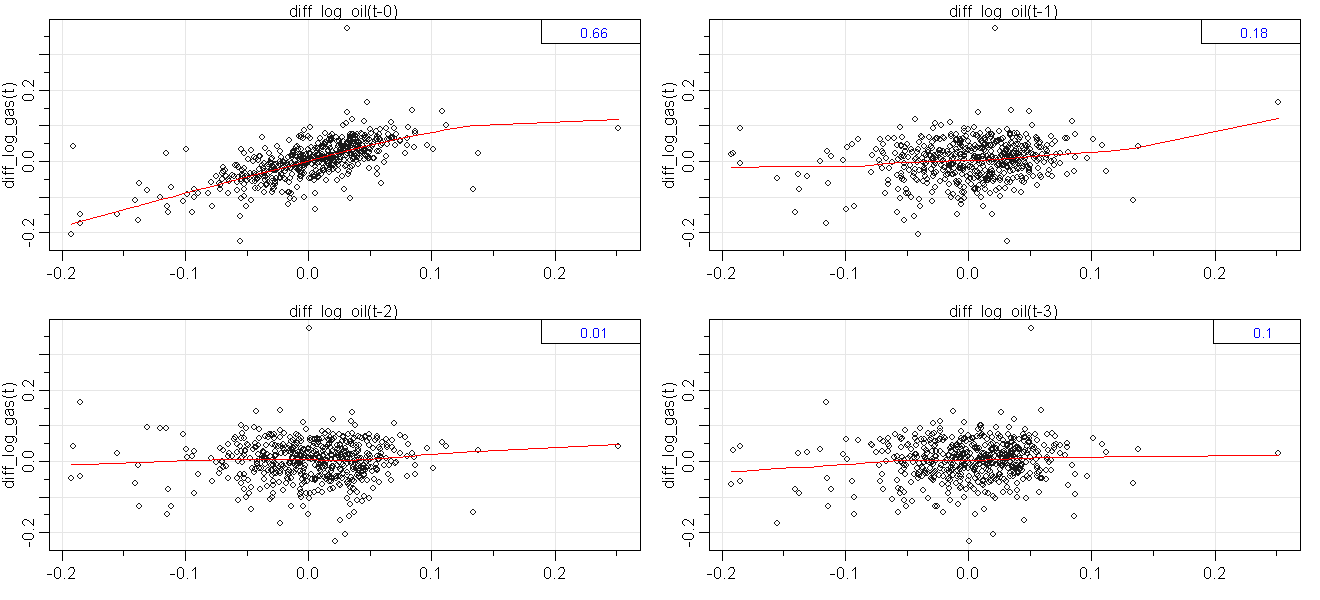

In [28]:
lag2.plot(diff_log_oil, diff_log_gas, 3)

Confirmarmos que además de encontrar correlación entre los valores en t, se muestran significativos los valores en t-1 y t-3, auque la segunda más débil. 

#### (f)

In [29]:

indi = ifelse(diff_log_oil < 0, 0, 1)
mess = ts.intersect(diff_log_gas, diff_log_oil, diff_log_oilLag = lag(diff_log_oil,-1), indi)
summary(fit <- lm(diff_log_gas ~ diff_log_oil + diff_log_oilLag + indi, data=mess))


Call:
lm(formula = diff_log_gas ~ diff_log_oil + diff_log_oilLag + 
    indi, data = mess)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18451 -0.02161 -0.00038  0.02176  0.34342 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.006445   0.003464  -1.860  0.06338 .  
diff_log_oil     0.683127   0.058369  11.704  < 2e-16 ***
diff_log_oilLag  0.111927   0.038554   2.903  0.00385 ** 
indi             0.012368   0.005516   2.242  0.02534 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04169 on 539 degrees of freedom
Multiple R-squared:  0.4563,	Adjusted R-squared:  0.4532 
F-statistic: 150.8 on 3 and 539 DF,  p-value: < 2.2e-16


El coeficiente "indi" indica si durante el periodo analizado existió crecimiento en el precio del petroleo Por su parte, diff_log_oilLag representa el impacto de lo que suceció en el periodo anterior

Vemos que ambos valores son significativos, aunque para el caso de indi sólo tiene significación al 95%, no al 99% o más como el resto de los valores

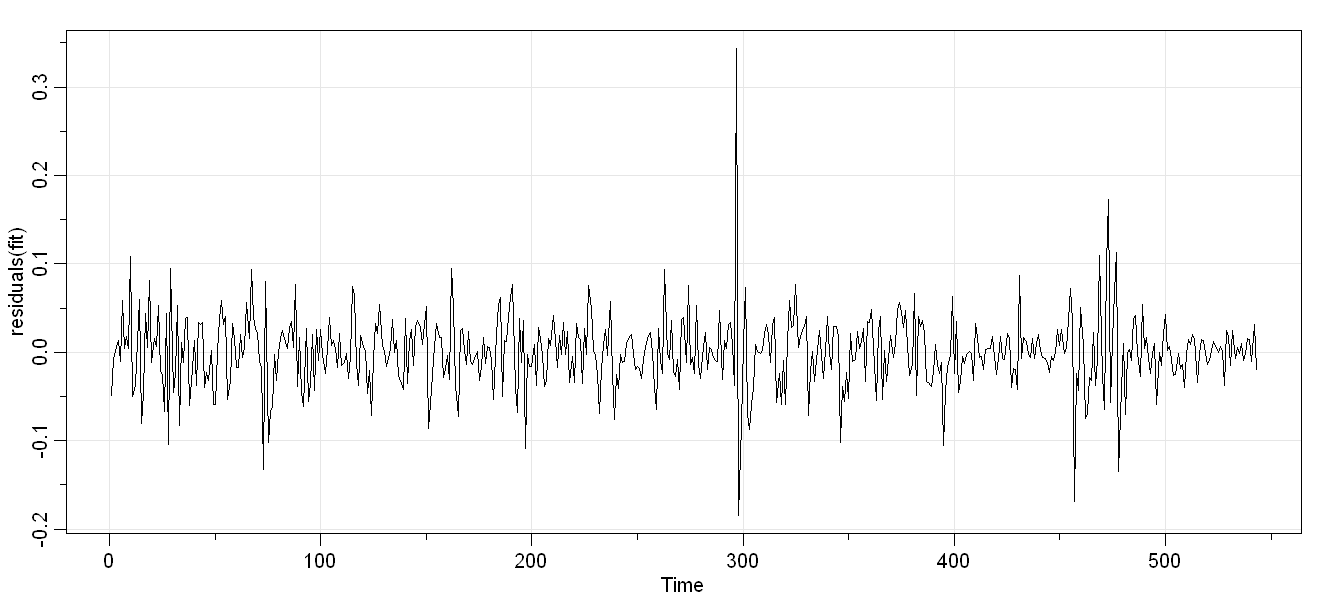

In [30]:
tsplot(residuals(fit))

ACF,-0.03,-0.05,0.00,0.06,-0.07,-0.09,-0.04,-0.04,-0.13,-0.04,...,-0.04,0.01,-0.04,0.01,0.01,0.02,-0.03,0.00,0.02,0.07
PACF,-0.03,-0.05,-0.01,0.06,-0.06,-0.09,-0.06,-0.05,-0.13,-0.06,...,-0.05,-0.01,-0.05,0.00,-0.03,-0.02,-0.07,-0.06,-0.03,0.03


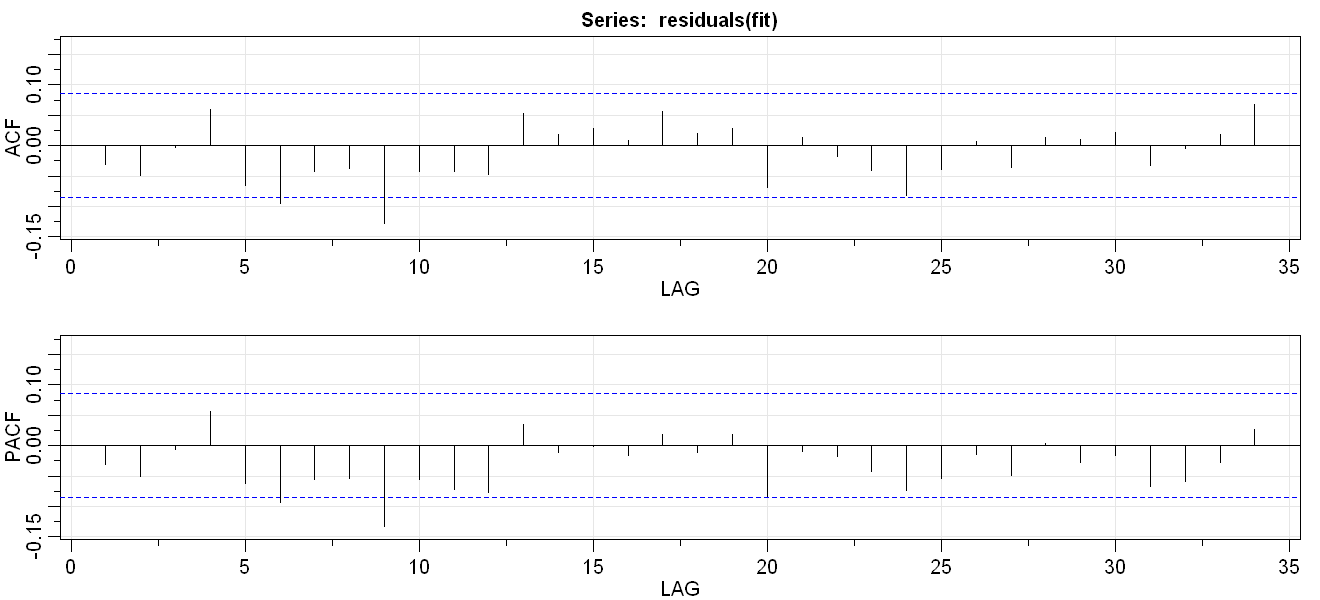

In [31]:
acf2(residuals(fit))

Los erores parecen comportarse como ruido blanco, en especial en el ACF y PACF. Quizás queda en duda el pico que se ve en el análisis de los residuos, seguramente motivo de algún shock externo no identificado. 

#### 3. Analizar el uso de la función `nls` para hacer una ajuste de *regresión logística* a la serie de poblaciones de Australia entre 1778 y 2005

In [32]:
# Definimos la serie

growth <- c(859, 645, 2056, 2873, 3264, 3514, 3579, 3466, 4100, 4344, 
    4588, 5088, 5217, 5945, 7014, 7238, 7598, 7707, 7910, 8794, 10263, 11560, 
    11566, 11875, 12630, 13957, 14086, 15063, 17553, 21192, 25859, 31472, 33543, 
    35492, 37364, 40632, 48072, 52505, 53882, 56300, 58197, 61934, 70039, 75981, 
    83937, 98095, 105556, 113354, 125120, 134488, 151868, 169939, 190408, 220968, 
    240984, 250848, 264287, 279148, 293249, 308797, 332328, 373362, 405356, 
    437665, 513796, 600992, 694917, 793260, 876729, 970287, 1050828, 1097305, 
    1145585, 1168149, 1206918, 1259292, 1325183, 1390043, 1443955, 1483848, 
    1539552, 1592157, 1647756, 1700888, 1742847, 1794520, 1849392, 1898223, 
    1958679, 2031130, 2092164, 2162343, 2231531, 2306736, 2388082, 2505736, 
    2605725, 2694518, 2788050, 2881362, 2981677, 3062477, 3151355, 3240985, 
    3305753, 3361895, 3426760, 3491621, 3553098, 3617783, 3664715, 3715988, 
    3765339, 3824913, 3875318, 3916592, 3974150, 4032977, 4091485, 4161722, 
    4232278, 4323960, 4425083, 4573786, 4746589, 4893741, 4971778, 4969457, 
    4917949, 4982063, 5080912, 5303574, 5411297, 5510944, 5637286, 5755986, 
    5882002, 6003027, 6124020, 6251016, 6355770, 6436213, 6500751, 6552606, 
    6603785, 6656695, 6707247, 6755662, 6810413, 6871492, 6935909, 7004912, 
    7077586, 7143598, 7201096, 7269658, 7347024, 7430197, 7517981, 7637963, 
    7792465, 8045570, 8307481, 8527907, 8739569, 8902686, 9089936, 9311825, 
    9530871, 9744087, 9947358, 10160968, 10391920, 10642654, 10846059, 11055482, 
    11280429, 11505408, 11704843, 11912253, 12145582, 12407217, 12663469, 13198380, 
    13409288, 13614344, 13831978, 13968881, 14110107, 14281533, 14430830, 14602481, 
    14807370, 15054117, 15288891, 15483496, 15677282, 15900566, 16138769, 16394641, 
    16687082, 16936723, 17169768, 17387023, 17581284, 17759999, 17951481, 18196054, 
    18420320, 18609115, 18814276, 19038338, 19272644, 19533972, 19770963, 20011882, 
    20252132, 20544064)
years <- c(1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 
    1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 
    1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 
    1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 
    1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 
    1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 
    1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 
    1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 
    1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 
    1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 
    1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 
    1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 
    1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 
    1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 
    1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 
    1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 
    1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 
    1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 
    2001, 2002, 2003, 2004, 2005)

population <- data.frame(growth, years)

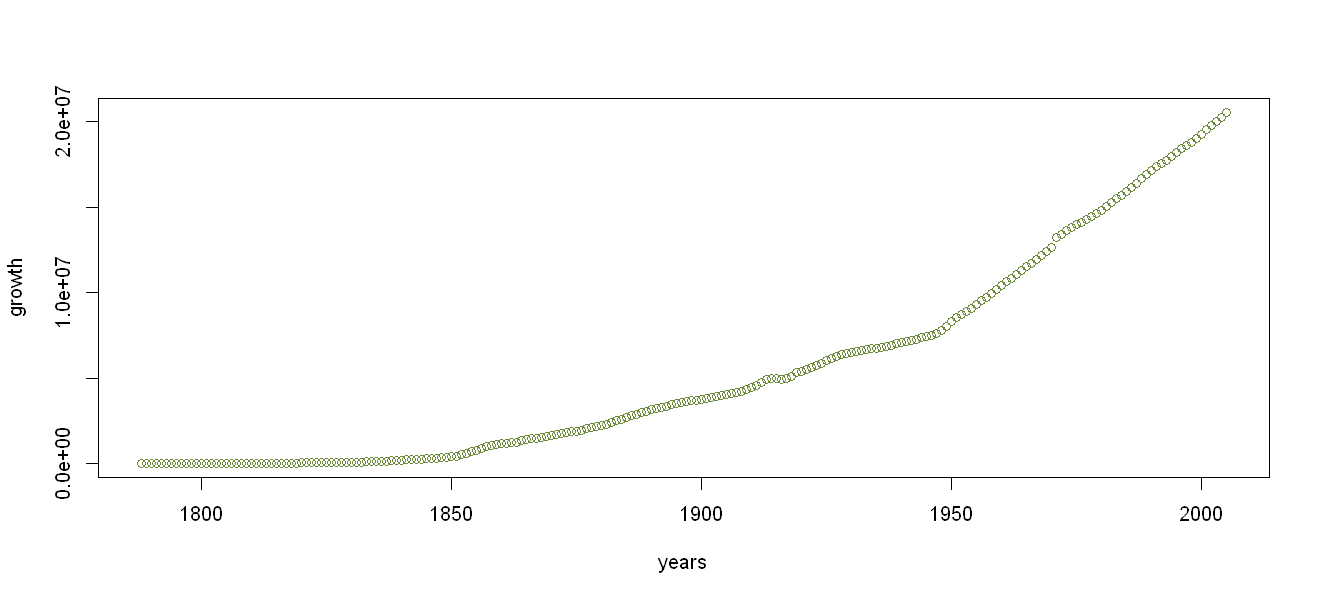

In [35]:
plot(years, growth, lty = 2, col= "darkolivegreen4")

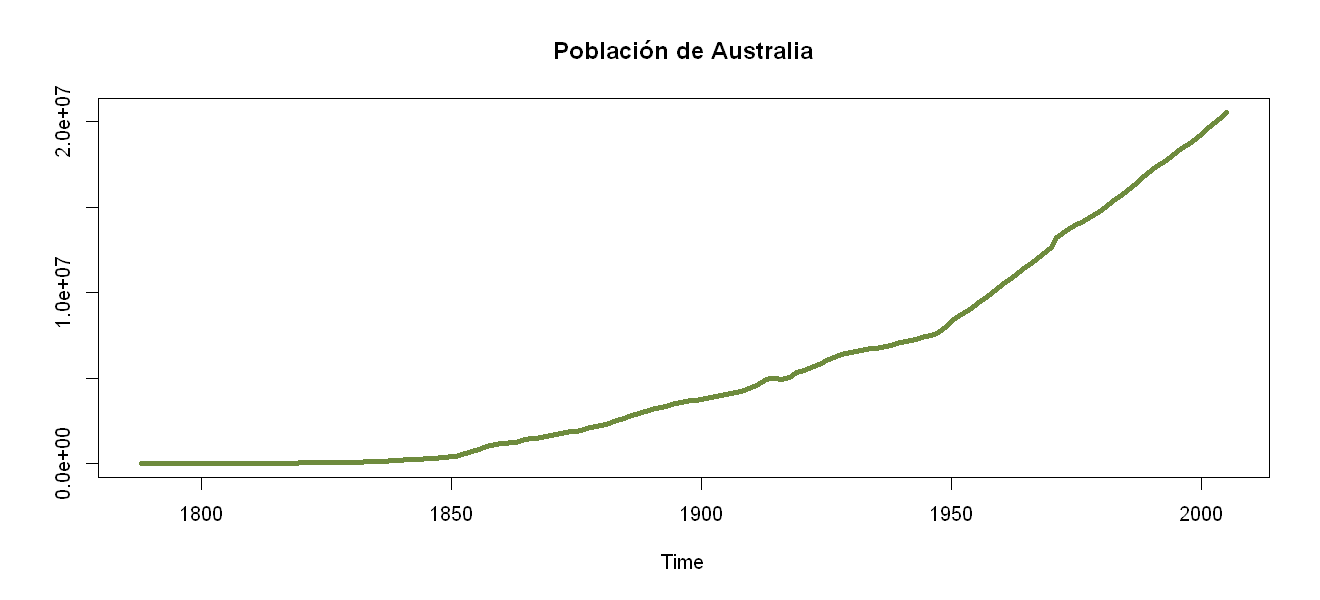

In [42]:
#Transformamos en Ts

xts = ts(growth, start=1788)
ts.plot(xts, ylab='', main='Población de Australia', col= "darkolivegreen4", lwd=4)


En el intento de ajustar una regresión losgística utilizando la función de non linear square regression deberíamos pasarle al modelo algunas pautas de por donde comenzar. En caso de no conocerlos, podemos probar utilizando la función SSlogis que nos calcula algunos parámetros de base. 

SSlogis(input, Asym, xmid, scal)

Para el ajuste podemos itnentar con lso valores en logaritmos


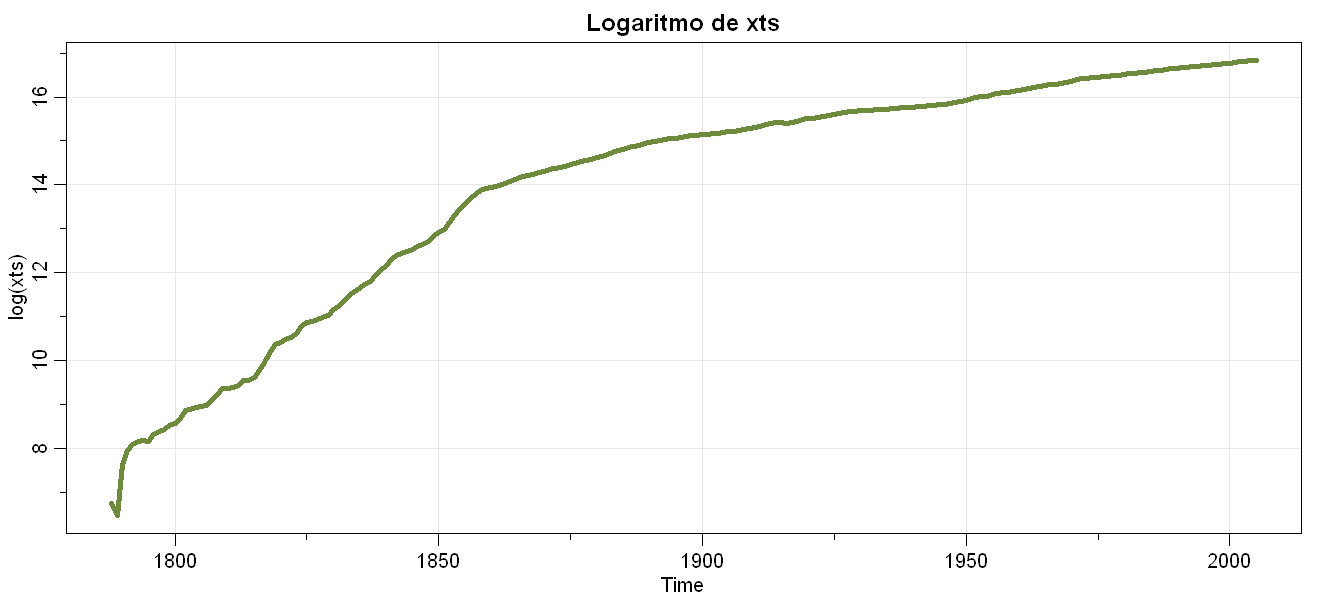

In [45]:
tsplot(log(xts), main='Logaritmo de xts',  col= "darkolivegreen4", lwd=4)

In [46]:
nls_Log <- nls(growth ~ SSlogis(years, Asym, xmid, scal), data = population)
nls_Log

Nonlinear regression model
  model: growth ~ SSlogis(years, Asym, xmid, scal)
   data: population
     Asym      xmid      scal 
3.879e+07 2.000e+03 4.185e+01 
 residual sum-of-squares: 3.694e+13

Number of iterations to convergence: 0 
Achieved convergence tolerance: 6.079e-06

In [51]:
#Hacemos predict del modelo y vemos los resultados en conjunto con la serie original

Pred_nls_log = ts(predict(nls_Log), start = 1788)
length(Pred_nls_log)

length(xts)

[1] 218

[1] 218

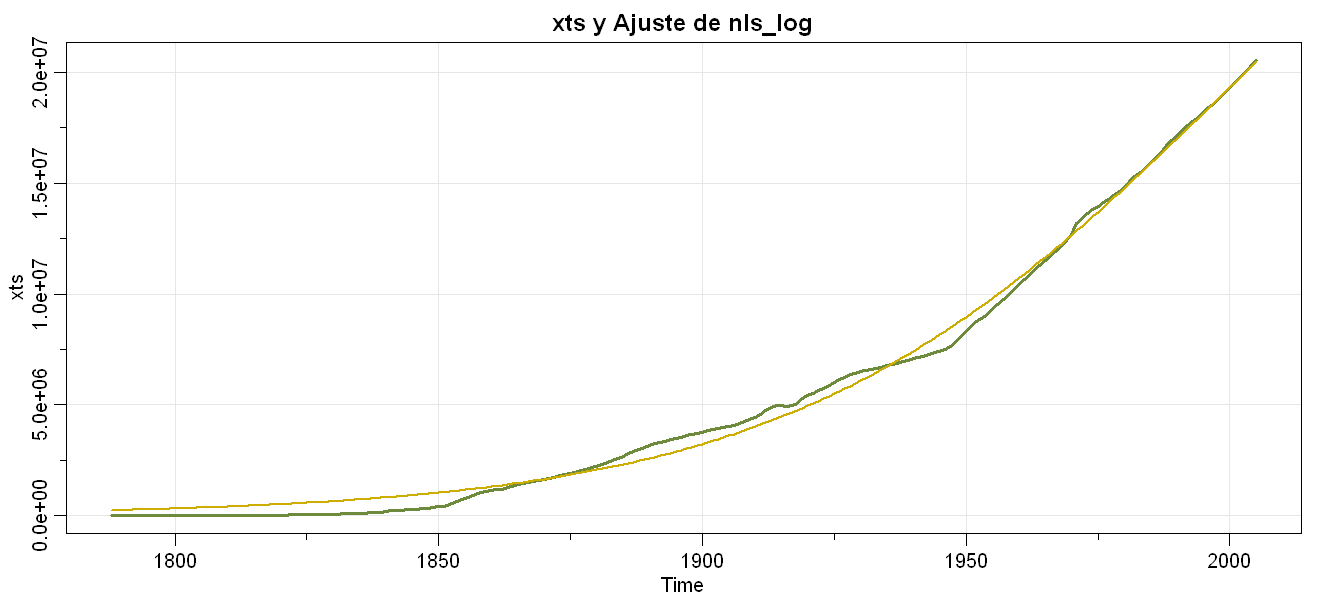

In [55]:
tsplot(xts, main='xts y Ajuste de nls_log', col = "darkolivegreen4", lwd = 3)

lines(Pred_nls_log, col = "gold3", lwd=2)

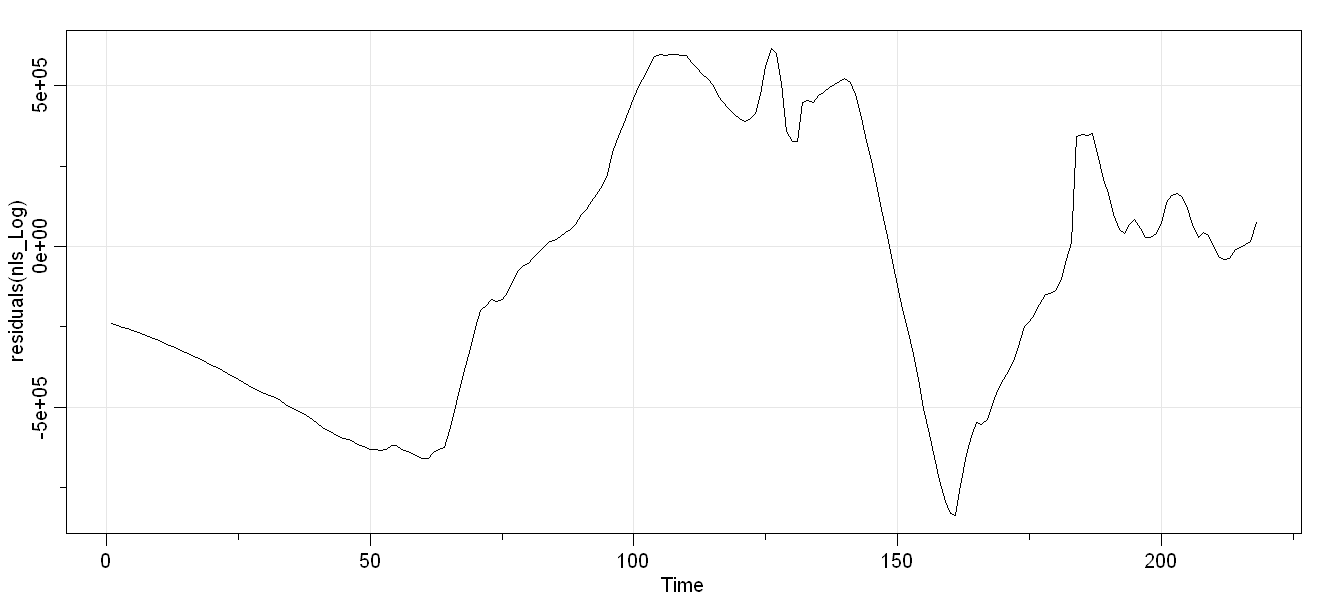

In [59]:
tsplot(residuals(nls_Log))

ACF,0.99,0.98,0.96,0.94,0.91,0.89,0.86,0.83,0.80,0.76,...,0.54,0.51,0.47,0.43,0.40,0.36,0.33,0.29,0.26,0.23
PACF,0.99,-0.54,-0.17,-0.01,0.04,-0.07,-0.13,-0.02,-0.01,-0.04,...,0.00,0.02,-0.01,0.06,-0.04,0.00,-0.04,0.00,0.10,-0.01


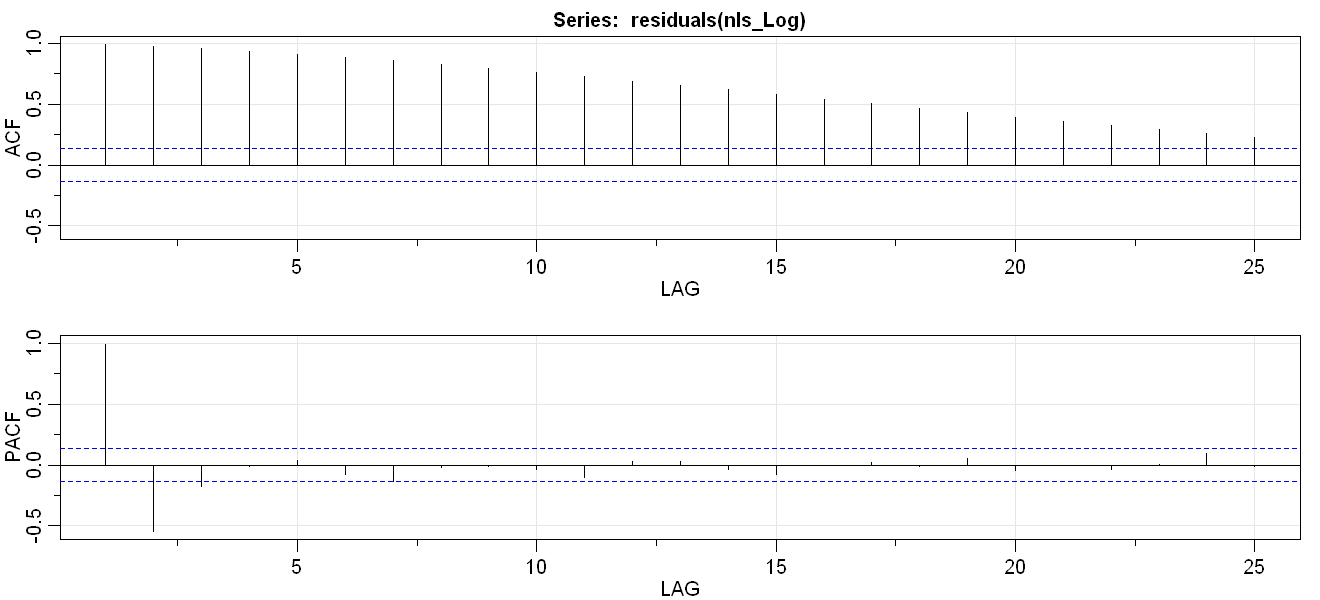

In [60]:
acf2(residuals(nls_Log))

Los residuos que vemos hacen considerar en seguir trabajando la serie aplicando otro tipo de análisis sobre los residuos en el futuro